# Amplitude amplitude coupling

The measurement of amplitude amplitude coupling is a very commonly used and effective function. Below, I will provide a detailed explanation of the call parameters of functional  phase amplitude coupling, as shown in [source code](https://scut-eeg-feature.readthedocs.io/en/latest/api/scuteegfe/features/any_feature/index.html#scuteegfe.features.any_feature.compute_aac_connectivity), and give appropriate examples.

## Import related packages

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from scuteegfe import Feature
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mne_connectivity.viz import plot_connectivity_circle
import seaborn as sns

In [2]:
data = np.random.rand(2, 5, 1000)

In [3]:
n_epcoh, n_channels, n_samples = data.shape
print(f"data.shape: {n_epcoh} epcoh X {n_channels} channels X {n_samples} samples")

data.shape: 2 epcoh X 5 channels X 1000 samples


## Single signal AAC
We calculate amplitude amplitude coupling (PAC) in single channel, which means the amplitude modulation of a signal corresponds to the amplitude of the same signal.

selected_funcs is 'aac_connectivity_mod' <br>  
- **Selected Function**: `aac_connectivity_mod__mod`     
- **Sample Frequency**: `aac_connectivity_mod__sfreq`: 250 Hz          
- **Frequency Bands**:    
  - AAC Phase Band: `[4, 8]` (Theta)      
  - AAC Amplitude Band: `[30, 45]` (Gamma)     
- **Mode**: `aac_connectivity_mod__mode`: 'self' (Single signal)     
We calculate AAC for a 250 Hz single channel for theta amplitude to gamma amplitude.  

In [4]:
fea1 = Feature(data = data, sfreq=250, selected_funcs=['aac_connectivity'],
                       funcs_params={
                                     "aac_connectivity__sfreq": 250,
                                     "aac_connectivity__band": np.array([[4, 8], [30, 45]]),
                                     "aac_connectivity__mode": 'self'
                                     } )

In [5]:
n_epcoh, n_channels, aac_value = fea1.features.shape
print(f"data.shape: {n_epcoh} epcoh X {n_channels} channels X {aac_value} aac_value")

data.shape: 2 epcoh X 5 channels X 1 aac_value


##  Different signals AACs
The amplitude and amplitude modulation between different signals is similar to a functional connection between different signals.

selected_funcs is 'pac_connectivity_mod' <br>    
- **Selected Function**: `aac_connectivity_mod__mod`     
- **Sample Frequency**: `aac_connectivity_mod__sfreq`: 250 Hz        
- **Frequency Bands**:     
  - AAC Phase Band: `[4, 8]` (Theta)    seed
  - AAC Amplitude Band: `[30, 45]` (Gamma)  target   
- **Mode**: `aac_connectivity_mod__mode`: 'non-self' (Different signals)    
We calculate AAC for a 250 Hz multi-channel for theta amplitude to gamma amplitude.  

In [6]:
data = np.random.rand(2, 5, 1000)
fea1 = Feature(data = data, sfreq=250, selected_funcs=['aac_connectivity'],
                       funcs_params={
                                     "aac_connectivity__sfreq": 250,
                                     "aac_connectivity__band": np.array([[4, 8], [30, 45]]),
                                     "aac_connectivity__mode": 'non-self'
                                     } )

In [7]:
n_epcoh, n_channels, n_channels = fea1.features.shape
print(f"data.shape: {n_epcoh} epcoh X {n_channels} channels X {n_channels} n_channels")

data.shape: 2 epcoh X 5 channels X 5 n_channels


## Visualization of AAC

<Axes: >

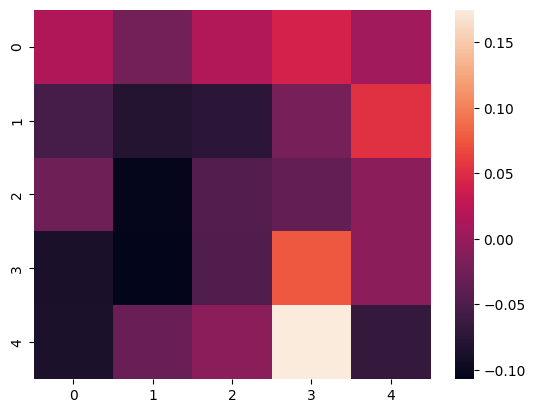

In [8]:
sns.heatmap(fea1.features[0])

fea2.features[k,i,j] represents that  the i-th channel signal of theta phase modulate the j-th  channel signal of gamma amplitude for k-th epcoh data.

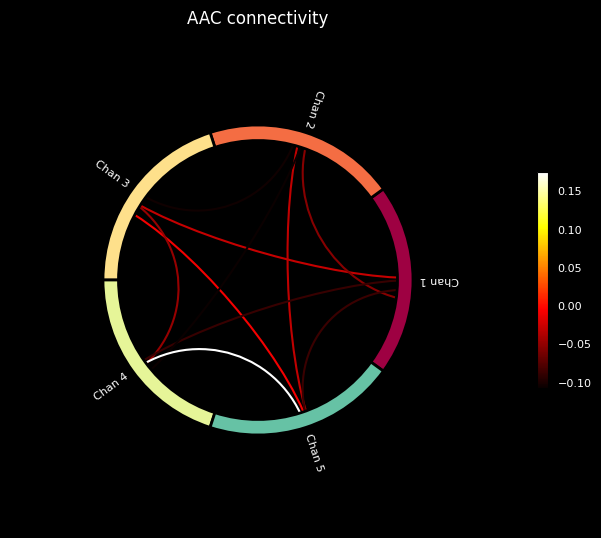

(<Figure size 800x800 with 2 Axes>,
 <PolarAxes: title={'center': 'AAC connectivity'}>)

In [9]:
fig, ax = plt.subplots(figsize=(8, 8),  facecolor="Black", subplot_kw=dict(polar=True))
plot_connectivity_circle(fea1.features[0], [f'Chan {i+1}' for i in range(n_channels)],
                         title = f'AAC connectivity', colormap = "hot",  colorbar_size = 0.35, colorbar_pos = (0, 0.5), ax=ax)